In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

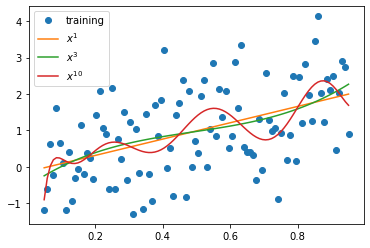

In [2]:
# linear function with noise n
N_train=100
sigma_train=1
n = sigma_train*np.random.randn(N_train)
x=np.linspace(0.05,0.95,N_train)
y = 2*x+n

# linear regression
clf1 = LinearRegression()
X1 = x.reshape((len(x),1))
clf1.fit(X1,y)

# polynomial regressions
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(X1)
clf3 = LinearRegression()
clf3.fit(X3,y)

poly10 = PolynomialFeatures(degree=10)
X10 = poly10.fit_transform(X1)
clf10 = LinearRegression()
clf10.fit(X10,y)

#plot
plt.plot(x, y, "o", ms=2, label="training")
plt.plot(x, clf1.predict(X1), label="$x^1$")
plt.plot(x, clf3.predict(X3), label="$x^3$")
plt.plot(x, clf10.predict(X10), label="$x^{10}$")

plt.legend()
plt.show()